<a href="https://colab.research.google.com/github/gopigit25/MachineLearning/blob/main/knn_exercise_digits_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df=pd.DataFrame(digits.data,digits.target)
df.info()

In [ ]:
df['target']=digits.target
df.head()

In [43]:
import sklearn.model_selection as ms
X_train,X_test,Y_train,Y_test=ms.train_test_split(df.drop('target',axis=1),df.target,test_size=0.2,random_state=42)
print(X_train.head(5))

    0    1     2     3     4     5    6    7    8    9   ...    54   55   56  \
6  0.0  0.0   3.0  14.0   1.0   0.0  0.0  0.0  0.0  0.0  ...  11.0  0.0  0.0   
0  0.0  0.0   9.0   9.0   4.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
0  0.0  0.0   0.0  10.0  13.0   3.0  0.0  0.0  0.0  0.0  ...   1.0  0.0  0.0   
3  0.0  1.0  10.0  16.0  16.0  11.0  0.0  0.0  0.0  5.0  ...   4.0  0.0  0.0   
0  0.0  0.0   6.0  14.0  13.0   3.0  0.0  0.0  0.0  0.0  ...   2.0  0.0  0.0   

    57    58    59    60    61   62   63  
6  0.0   3.0  11.0  16.0  13.0  4.0  0.0  
0  0.0   6.0  16.0  14.0   3.0  0.0  0.0  
0  0.0   2.0  11.0  13.0   6.0  0.0  0.0  
3  1.0  15.0  14.0  11.0   4.0  0.0  0.0  
0  0.0   4.0  15.0  16.0   9.0  0.0  0.0  

[5 rows x 64 columns]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
len(X_test)

360

In [33]:
len(X_train)

1437

In [46]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [47]:
knn.score(X_test,Y_test)

0.9861111111111112

In [48]:
from sklearn.metrics import confusion_matrix
Y_Test = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_Test)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]])

Text(58.222222222222214, 0.5, 'Truth')

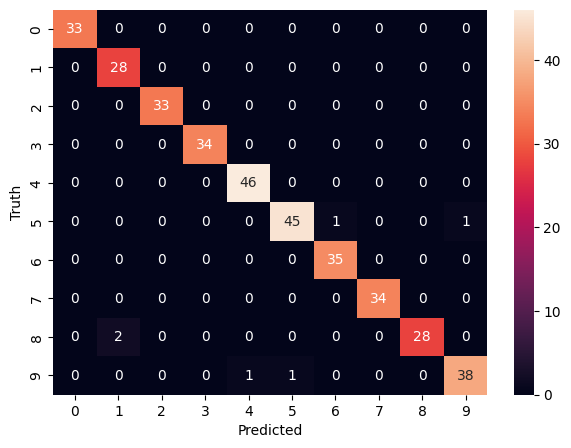

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')